# Stock Sentiment Headline Analysis Project

Goal: To analyze stocks from a dataset by comparing the sentiments of their headlines by using Natural Language Processing (NLP)

Users will also be able to input a stock, and the program will output the sentiment of the stocks headline, along with a few other stats and comparision points for the user to advise their decisions as to whether they wish to purchase the stock

## 1. Library Imports

In [39]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Loading and Understanding

In [7]:
stocks = pd.read_csv("data/nasdaq.csv", on_bad_lines='skip')

In [8]:
# Previewing stock
stocks.head(10)

,Label,Ticker,Headline
0,0,A,@TotesTravel : Airline shares tumble as New Yo...
1,1,A,@TotesTravel : American United call off Hong K...
2,0,A,@TotesTravel : U.S. airline stocks hit highest...
3,1,A,@TotesTravel : American Airlines reaches deal ...
4,1,A,@TotesTravel : US airlines Treasury Department...
5,0,AAPL,Apple Inc and its main contract manufacturing ...
6,0,AAPL,European Union regulators who slapped Apple In...
7,1,AAPL,The EU's ruling that Apple Inc must pay a huge...
8,0,AAPL,Russia wants Apple SAP to cooperate against fo...
9,1,AAPL,U.S. Companies Are Stashing $2.1 Trillion Over...


In [9]:
stocks.info()
len(stocks["Ticker"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13181 entries, 0 to 13180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Label     13181 non-null  int64 
 1   Ticker    13181 non-null  object
 2   Headline  13181 non-null  object
dtypes: int64(1), object(2)
memory usage: 309.1+ KB


546

## 3. Sentiment Analysis

In [10]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()

# Return the sentiment score of each headline
def get_polarity_scores(headline):
    scores = sia.polarity_scores(headline)
    # Get returned in a dictionary
    return scores["neg"], scores["pos"], scores["neu"], scores["compound"]
    

# Apply polarity scoring function and save scores into separate columns
stocks[['Negative', 'Positive', 'Neutral', 'Compound']] = stocks['Headline'].apply(lambda x: pd.Series(get_polarity_scores(x)))


In [11]:
stocks.head(20)

,Label,Ticker,Headline,Negative,Positive,Neutral,Compound
0,0,A,@TotesTravel : Airline shares tumble as New Yo...,0.038,0.060,0.902,0.2023
1,1,A,@TotesTravel : American United call off Hong K...,0.000,0.078,0.922,0.4215
2,0,A,@TotesTravel : U.S. airline stocks hit highest...,0.000,0.074,0.926,0.4215
3,1,A,@TotesTravel : American Airlines reaches deal ...,0.000,0.086,0.914,0.3400
4,1,A,@TotesTravel : US airlines Treasury Department...,0.000,0.169,0.831,0.6249
5,0,AAPL,Apple Inc and its main contract manufacturing ...,0.083,0.083,0.833,-0.2500
6,0,AAPL,European Union regulators who slapped Apple In...,0.000,0.000,1.000,0.0000
7,1,AAPL,The EU's ruling that Apple Inc must pay a huge...,0.032,0.181,0.787,0.7506
8,0,AAPL,Russia wants Apple SAP to cooperate against fo...,0.000,0.126,0.874,0.6705
9,1,AAPL,U.S. Companies Are Stashing $2.1 Trillion Over...,0.052,0.069,0.879,0.1779


## 4. Data Cleaning

Cleaning up stock rows that have NA values or have too many 0.000 values for their negative, positive, and compound scores

In [12]:
stocks.isna()

,Label,Ticker,Headline,Negative,Positive,Neutral,Compound
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13176,False,False,False,False,False,False,False
13177,False,False,False,False,False,False,False
13178,False,False,False,False,False,False,False
13179,False,False,False,False,False,False,False


In [13]:
stocks.loc[stocks.isna().any(axis=1)]

,Label,Ticker,Headline,Negative,Positive,Neutral,Compound


In [14]:
# Drop stocks with NA values
stocks.dropna()

,Label,Ticker,Headline,Negative,Positive,Neutral,Compound
0,0,A,@TotesTravel : Airline shares tumble as New Yo...,0.038,0.060,0.902,0.2023
1,1,A,@TotesTravel : American United call off Hong K...,0.000,0.078,0.922,0.4215
2,0,A,@TotesTravel : U.S. airline stocks hit highest...,0.000,0.074,0.926,0.4215
3,1,A,@TotesTravel : American Airlines reaches deal ...,0.000,0.086,0.914,0.3400
4,1,A,@TotesTravel : US airlines Treasury Department...,0.000,0.169,0.831,0.6249
...,...,...,...,...,...,...,...
13176,1,ZNGA,Bitcoin Tops $1000 Again as Zynga Accepts Virt...,0.000,0.444,0.556,0.6808
13177,1,ZNGA,Zynga Accepts Bitcoin For Microtransactions,0.000,0.365,0.635,0.3182
13178,1,ZUMZ,Zumiez (ZUMZ) unusual put activity into earnin...,0.000,0.000,1.000,0.0000
13179,1,ZUMZ,Zumiez Is Going Bankrupt,0.545,0.000,0.455,-0.5574


Code below ses the .apply feature to remove rows that have neg, pos, and compound rows that are 0

In [15]:
# If the negative, positive, neutral, and compound are all 0, then we will cut out the row for that stock
def map_stock(neg, pos, comp):
    print(neg, pos, comp)
    if (int)(neg*100) == 0 and (int)(pos*100) == 0 and (int)(comp*100) == 0:
        return None
    return comp

# Map the values for the compound
stocks["Compound"] = stocks.apply(lambda row: map_stock(row["Negative"], row["Positive"], row["Compound"]), axis=1)

stocks.dropna()


0.038 0.06 0.2023
0.0 0.078 0.4215
0.0 0.074 0.4215
0.0 0.086 0.34
0.0 0.169 0.6249
0.083 0.083 -0.25
0.0 0.0 0.0
0.032 0.181 0.7506
0.0 0.126 0.6705
0.052 0.069 0.1779
0.158 0.092 -0.4767
0.0 0.0 0.0
0.053 0.0 -0.128
0.0 0.069 0.4215
0.262 0.0 -0.8957
0.0 0.0 0.0
0.0 0.069 0.4215
0.0 0.0 0.0
0.12 0.072 -0.1779
0.318 0.0 -0.7184
0.072 0.15 0.5859
0.0 0.073 0.4404
0.236 0.0 -0.8625
0.077 0.124 0.1531
0.06 0.0 -0.1027
0.22 0.0 -0.4767
0.153 0.0 -0.6808
0.0 0.255 0.8519
0.247 0.0 -0.3182
0.044 0.133 0.5936
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.399 0.743
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.115 0.6224
0.0 0.345 0.577
0.03 0.055 0.296
0.247 0.0 -0.3182
0.126 0.0 -0.6682
0.0 0.17 0.5697
0.31 0.0 -0.5574
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.264 0.4995
0.366 0.0 -0.6369
0.0 0.098 0.3612
0.167 0.0 -0.296
0.128 0.0 -0.296
0.0 0.0 0.0
0.0 0.0 0.0
0.048 0.0 -0.1027
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
0.063 0.078 -0.0516
0.15 0.0 -0.3182
0.0 0.0 0.0
0.0 0.074 0.34
0.0 0.127 0.4939
0.0 0.0 0.0
0.3

,Label,Ticker,Headline,Negative,Positive,Neutral,Compound
0,0,A,@TotesTravel : Airline shares tumble as New Yo...,0.038,0.060,0.902,0.2023
1,1,A,@TotesTravel : American United call off Hong K...,0.000,0.078,0.922,0.4215
2,0,A,@TotesTravel : U.S. airline stocks hit highest...,0.000,0.074,0.926,0.4215
3,1,A,@TotesTravel : American Airlines reaches deal ...,0.000,0.086,0.914,0.3400
4,1,A,@TotesTravel : US airlines Treasury Department...,0.000,0.169,0.831,0.6249
...,...,...,...,...,...,...,...
13175,1,ZNGA,Zynga sues sex app maker over Bang With Friend...,0.000,0.256,0.744,0.4767
13176,1,ZNGA,Bitcoin Tops $1000 Again as Zynga Accepts Virt...,0.000,0.444,0.556,0.6808
13177,1,ZNGA,Zynga Accepts Bitcoin For Microtransactions,0.000,0.365,0.635,0.3182
13179,1,ZUMZ,Zumiez Is Going Bankrupt,0.545,0.000,0.455,-0.5574


## 5. Data Testing/Experimenting

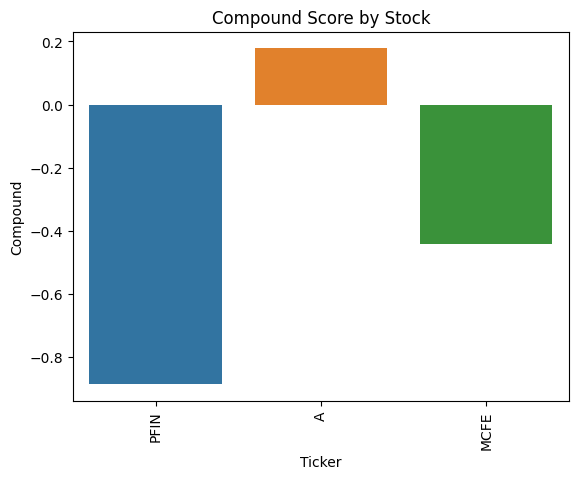

In [16]:
# Graph 3 random stocks and their compounded sentiments
ax = sns.barplot(data=stocks.sample(3), x='Ticker', y='Compound', hue='Ticker')
ax.set_title('Compound Score by Stock')
plt.xticks(rotation='vertical')
plt.show()

## 6. User-Inputted Stock Data Exploration

Prompt user for stock

In [17]:
# Prompt the user for their stock
chosen_stock = input("Pick a stock to evaluate. Enter in ticker format (Apple = AAPL)")


In [18]:
print(chosen_stock)

AAPL


Chosen stock compound score calculation

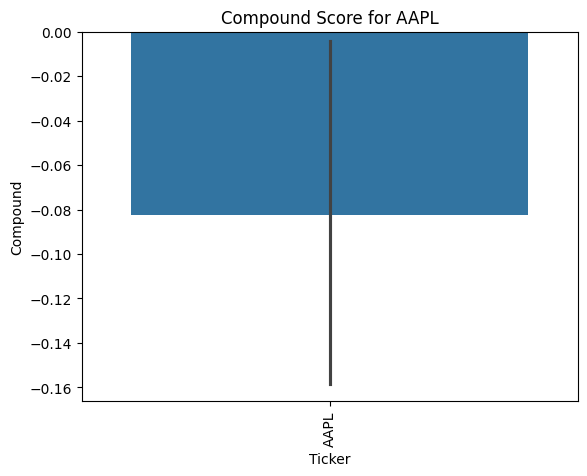

In [19]:
# Return the chosen stock's compound chart
ax = sns.barplot(data=stocks.loc[stocks["Ticker"] == chosen_stock], x='Ticker', y='Compound', hue='Ticker')
ax.set_title('Compound Score for ' + chosen_stock)
plt.xticks(rotation='vertical')
plt.show()

Calculate the average compound score for the chosen stock

In [28]:
# Calculate average compound sentiment score for the chosen stock
averages = stocks.groupby("Ticker")[["Compound"]].mean()
average_compound = averages.loc[chosen_stock]["Compound"]
average_compound = round(average_compound, 4)

Evaluate whether there is generally negative or positive coverage

In [29]:
# Return the sentiment analysis information for the chosen stock
# Positive, negative, neutral, and compound sentiments
print("The average sentiment for the headlines for " + str(chosen_stock) + " is " + str(average_compound))
if average_compound < 0:
    print("Because the average sentiment is less than 0, there has tended to be negative coverage of the selected stock")
else:
    print("Because the average sentiment is greater than 0, there has tended to be positive coverage of the selected stock")


The average sentiment for the headlines for AAPL is -0.0824
Because the average sentiment is less than 0, there has tended to be negative coverage of the selected stock


# Stock Price Comparision

In [22]:
prices = pd.read_csv("data/stock prices.csv", on_bad_lines='skip')

In [23]:
prices.head(10)

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
5,ABT,2014-01-02,38.0900,38.4000,38.0000,38.2300,4967472
6,ACN,2014-01-02,81.5000,81.9200,81.0900,81.1300,2405384
7,ADBE,2014-01-02,59.0600,59.5300,58.9400,59.2900,2746370
8,ADI,2014-01-02,49.5200,49.7500,49.0400,49.2800,2799092
9,ADM,2014-01-02,43.2200,43.2900,42.7900,42.9900,2753765


In [77]:
# Meeting at the beginning of lunch
if chosen_stock not in prices["symbol"].values:
    print("I cannot offer data on the history of this stock, as I do not have its price history")
else:
    ax = sns.scatterplot(data=prices.loc[prices["symbol"] == chosen_stock], x='date', y='open', hue='symbol')
    ax.set_title('Compound Score for ' + chosen_stock)
    plt.xticks(rotation='vertical')
    plt.show() 

ValueError: Could not interpret value `label` for `x`. An entry with this name does not appear in `data`.

In [76]:
range_comp = prices["open"].loc[prices["symbol"] == chosen_stock]
range = range_comp.iloc[-1] - range_comp.iloc[0]
if range > 0:
    print(str(chosen_stock) + " has seen positive growth, with a difference in the first measurement of the stock versus the most recent of " + range)
    if average_compound > 0:
        print("Given that the average compound was also positive, the headline sentiment is an appropriate indicator of the growth of the stock price")
    else:
        print("Given that the average compound is negative and actual growth positive, the sentiment and real stats do not align")
else:
    print(str(chosen_stock) + " has seen negative growth, with a difference in the first measurement of the stock versus the most recent of " + range)
    if average_compound < 0:
        print("Given that the average compound was also negative, the headline sentiment is an appropriate indicator of the decrease of the stock price")
    else:
        print("Given that the average compound is positive and actual growth negative, the sentiment and real stats do not align")



AAPL has seen positive growth
Given that the average compound is negative and actual growth positive, the sentiment and real stats do not align
